```{contents}

```

## Regression

Regression is a **statistical technique** to model the relationship between a **dependent variable (Y)** and one or more **independent variables (X’s)**.
It helps answer questions like: *“How does X affect Y?”* or *“Can we predict Y using X?”*

---

### Simple Linear Regression (SLR)

* **Definition:** Models the relationship between **one independent variable (X)** and **one dependent variable (Y)**.

* **Equation:**

  $$
  Y = \beta_0 + \beta_1X + \epsilon
  $$

  where:

  * $\beta_0$ = intercept (value of Y when X=0)
  * $\beta_1$ = slope (change in Y for one-unit change in X)
  * $\epsilon$ = error term

* **Example:** Predicting weight (Y) from height (X).

---

### Multiple Linear Regression (MLR)

* **Definition:** Models the relationship between **two or more independent variables (X₁, X₂, …, Xn)** and **one dependent variable (Y)**.

* **Equation:**

  $$
  Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n + \epsilon
  $$

* **Example:** Predicting house prices (Y) using features like area (X₁), number of bedrooms (X₂), and location score (X₃).

---

### Assumptions of Linear Regression

For regression to be valid and reliable, these assumptions must hold:

1. **Linearity**

   * The relationship between independent and dependent variables should be **linear**.
   * Example: If doubling advertising spend *does not* result in a proportional increase in sales, linearity is violated.

2. **Independence**

   * Observations should be **independent** of each other.
   * Example: If data points are repeated measures from the same subject without accounting for it, this assumption is violated.

3. **Homoscedasticity**

   * The **variance of residuals** (errors) should be constant across all levels of X.
   * If residuals fan out (increase with X), it’s called **heteroscedasticity**, which biases standard errors.

---

### Diagnostics

Once a regression model is built, diagnostics are used to check quality and validity.

1. **R² (Coefficient of Determination)**

   * Measures how much of the variation in Y is explained by X’s.
   * Value ranges from 0 to 1.

     * R² = 0 → model explains nothing
     * R² = 1 → model explains everything
   * Example: R² = 0.8 means 80% of variance in Y is explained by predictors.

2. **Residuals Analysis**

   * Residuals = observed value – predicted value.
   * Ideally, residuals should be:

     * Randomly scattered (no pattern)
     * Mean close to 0
   * Residual plots help check **linearity**, **homoscedasticity**, and **normality of errors**.

3. **Overfitting**

   * Model learns **noise** along with the signal.
   * High accuracy on training data but poor performance on new/test data.
   * Example: A regression model with too many predictors (polynomials, interactions) may overfit.

4. **Underfitting**

   * Model is too **simple** to capture relationships.
   * Low accuracy on both training and test data.
   * Example: Using only one predictor for a problem where multiple predictors matter.

---

**In summary:**

* **SLR** → one predictor, one response.
* **MLR** → multiple predictors.
* **Assumptions** ensure statistical validity.
* **Diagnostics (R², residuals, over/underfitting)** ensure model quality.



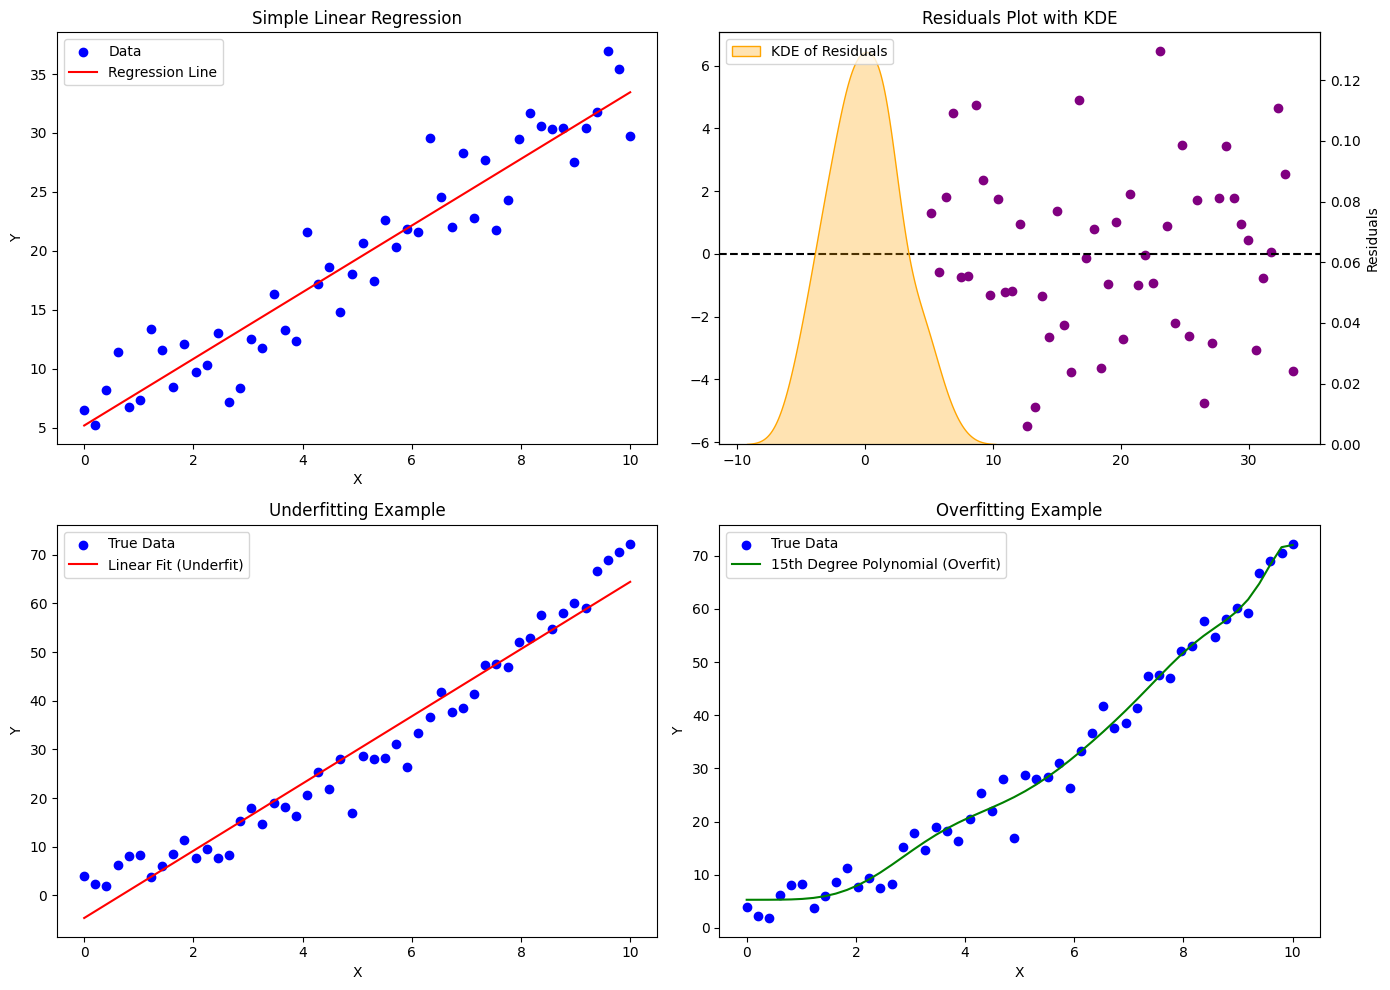

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns  # Added for KDE plot

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3 * X.squeeze() + 5 + np.random.normal(0, 3, size=50)

# --- Plot 1: Simple Linear Regression ---
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# --- Plot 2: Residuals Analysis with KDE ---
residuals = y - y_pred

plt.subplot(2, 2, 2)
plt.scatter(y_pred, residuals, color="purple", label="Residuals")
plt.axhline(y=0, color="black", linestyle="--")
sns.kdeplot(residuals, color='orange', fill=True, alpha=0.3, label='KDE of Residuals', ax=plt.gca().twinx())
plt.title("Residuals Plot with KDE")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')

# --- Plot 3: Underfitting Example ---
# True relationship is quadratic, but fitting linear model
y_true_quad = 0.5 * X.squeeze()**2 + 2*X.squeeze() + 3 + np.random.normal(0, 3, size=50)
lin_model = LinearRegression()
lin_model.fit(X, y_true_quad)
y_underfit = lin_model.predict(X)

plt.subplot(2, 2, 3)
plt.scatter(X, y_true_quad, color="blue", label="True Data")
plt.plot(X, y_underfit, color="red", label="Linear Fit (Underfit)")
plt.title("Underfitting Example")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# --- Plot 4: Overfitting Example ---
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_true_quad)
y_overfit = poly_model.predict(X_poly)

plt.subplot(2, 2, 4)
plt.scatter(X, y_true_quad, color="blue", label="True Data")
plt.plot(X, y_overfit, color="green", label="15th Degree Polynomial (Overfit)")
plt.title("Overfitting Example")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()
